In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import copy
from statistics import mean

In [2]:
def loop_grid(matrix, mkd, a, width, height, neighbours):
    
    # protential grid
    transH = np.ones((width, height))
    transI = np.ones((width, height))
    transC = np.ones((width, height))
    
    list_distances = [1, 1.4, 2, 2.2, 2.8, 3, 3.2, 3.6, 4, 4.1, 4.2, 4.5, 5, 5.1, 5.4, 5.7, 5.8, 6, 6.1, 6.3, 6.4, 6.7, 7.1, 7.2, 7.8, 8.5]
    
    #i,j current house grid
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            # k,l is neighbourhood
            for k in range(i-(neighbours), i+(neighbours+1)):
                for l in range(j-(neighbours), j+(neighbours+1)):
                    
                    #only if neighboorhoud exists
#                   check if the neigbours are inside grid
                    if k < 0 or k > (width-1) or l < 0 or l > (height-1):
                        continue
            
                    else:
                        '''zoek op in dict:
                        ik ben zelf Matrix[i,j]
                        ik kijk naar Matrix[k,l]
                        ik kan worden loop [H, I, C] en update probabilitygrid
                        Eet een koekje
                        '''  
                    
#                       als degene waar je naar kijkt een huis is
                        if matrix[k, l] != 0 and (k, l) != (i, j) and matrix[i, j] != 3:
        
#                           op basis van hoe ver het huis van je vandaan zit krijg je een score uit de mkd
                            # Trans House potential
    
                            distance = round(np.sqrt((abs(i - k))**2 + (abs(l - j))**2), 1)
                            index_distance = list_distances.index(distance)
    
    
                            # kans op house worden, met wat we zelf zijn (matrix[i, j]) bepaald door plek waar we kijken en distance
#                             print(mkd[int(matrix[i, j])][1][int(matrix[k, l])][distance])
                            if matrix[i, j] != 2 and matrix[i, j] != 3:
                                transH[i, j] += mkd[int(matrix[i, j])][1][int(matrix[k, l])-1][index_distance]
            
                            # Trans Industry potential
                            if matrix[i, j] != 3:
                                transI[i, j] += mkd[int(matrix[i, j])][2][int(matrix[k, l])-1][index_distance]
                    
                            # Trans Commerce potential
                            transC[i, j] += mkd[int(matrix[i, j])][3][int(matrix[k, l])-1][index_distance]
                            
    for i in range(len(transH)):
        for j in range(len(transH[0])):
            S = 1 + (-np.log(random.random()))**(a)
            transH[i, j] *= S
            S = 1 + (-np.log(random.random()))**(a)
            transI[i, j] *= S
            S = 1 + (-np.log(random.random()))**(a)
            transC[i, j] *= S
            

    return transH, transI, transC

In [66]:
# V, H, I, C
# 0, 1, 2, 3

width = 50
height = 50

city = np.zeros((width, height))

steps = 25

# initial_commerce = [(25,25), (25,24), (26,24)]
# initial_industry = [(26,25), (26,26), (26,27), (27,23)]
# initial_houses = [(23,25), (23,26), (24,23), (24,24), (24,25), (24,26), (25,23), (25,26), (26,23), (27,24), (27,25), (27,26)]

city[int(width/2), int(height/2)] = 1

# for com in initial_commerce:
#     city[com] = 3
    
# for ind in initial_industry:
#     city[ind] = 2
    
# for h in initial_houses:
#     city[h] = 1

# city[(25, 25)] = 1
# plt.matshow(city, cmap = 'Greys')
# plt.colorbar()
# plt.show()

Nh = 0.02
a = 1.5

mkd = {0: {1: [[2,2,1.5,1.5,1,1,1,1,0.5,0.5,0.5,0.5,0.5,0.1,0.1,0.1,0.1,0.1,0,0,0,0,0,0,0,0], 
               [-10,-10,-5,-3,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [-2,-1,2,1,1,1,0.5,0.5,0.4,0.3,0.2,0.1,0.1,0.1,0,0,0,0,0,0,0,0,0,0,0,0]], 
           2: [[-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [3,3,2,1,0,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]], 
           3: [[4,3.5,3,2.5,2,2,2,1.5,1.5,1.5,1.5,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [25,25,25,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,0]]}, 
       1: {1: [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]], 
           2: [[-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
               [2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
               [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]], 
           3: [[4,3.5,3,2.5,2,2,2,1.5,1.5,1.5,1.5,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0], 
               [1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
               [25,25,25,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0]]},
       2: {1: [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]], 
           2: [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]], 
           3: [[4,3.5,3,2.5,2,2,2,1.5,1.5,1.5,1.5,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0], 
               [-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
               [25,25,25,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0]]}}

    
def simulate_growth(city, width, height, steps, Nh, a, mkd, n):
    citiesovertime = []

    for step in range(steps):
        transH, transI, transC = loop_grid(city, mkd, a, width, height, n)

        orderedhouses = transH.flatten().argsort()[::-1]
        orderedindustry = transI.flatten().argsort()[::-1]
        orderedcommerce = transC.flatten().argsort()[::-1]

        newhouses = orderedhouses[0:round((((width*height)*Nh)/12)*7)]
        for house in range(round((((width*height)*Nh)/12)*7)):
            orderedhouses = np.delete(orderedhouses, house)

        newindustry = orderedindustry[0:round((((width*height)*Nh)/12)*4)]
        for ind in range(round((((width*height)*Nh)/12)*4)):
            orderedindustry = np.delete(orderedindustry, ind)

        newcommerce = orderedcommerce[0:round(((width*height)*Nh)/12)]
        for com in range(round(((width*height)*Nh)/12)):
            orderedcommerce = np.delete(orderedcommerce, com)

        while len(set(newcommerce) & set(newindustry)) != 0:
            for doubleindex in (set(newcommerce) & set(newindustry)):
                if transI[doubleindex//width, doubleindex%height] > transC[doubleindex//width, doubleindex%height]:
                    newcommerce = np.delete(newcommerce, np.where(newcommerce == doubleindex)[0])
                    newcommerce = np.append(newcommerce, orderedcommerce[0])
                    orderedcommerce = np.delete(orderedcommerce, 0)
                else:
                    newindustry = np.delete(newindustry, np.where(newindustry == doubleindex)[0])
                    newindustry = np.append(newindustry, orderedindustry[0])
                    orderedindustry = np.delete(orderedindustry, 0)

        while len(set(newcommerce) & set(newhouses)) != 0:
            for doubleindex in (set(newcommerce) & set(newhouses)):
                if transH[doubleindex//width, doubleindex%height] > transC[doubleindex//width, doubleindex%height]:
                    newcommerce = np.delete(newcommerce, np.where(newcommerce == doubleindex)[0])
                    newcommerce = np.append(newcommerce, orderedcommerce[0])
                    orderedcommerce = np.delete(orderedcommerce, 0)
                else:
                    newhouses = np.delete(newhouses, np.where(newhouses == doubleindex)[0])
                    newhouses = np.append(newhouses, orderedhouses[0])
                    orderedhouses = np.delete(orderedhouses, 0)

        while len(set(newhouses) & set(newindustry)) != 0:
            for doubleindex in (set(newhouses) & set(newindustry)):
                if transI[doubleindex//width, doubleindex%height] > transH[doubleindex//width, doubleindex%height]:
                    newhouses = np.delete(newhouses, np.where(newhouses == doubleindex)[0])
                    newhouses = np.append(newhouses, orderedhouses[0])
                    orderedhouses = np.delete(orderedhouses, 0)
                else:
                    newindustry = np.delete(newindustry, np.where(newindustry == doubleindex)[0])
                    newindustry = np.append(newindustry, orderedindustry[0])
                    orderedindustry = np.delete(orderedindustry, 0)


        for com in newcommerce:
            city[com//width, com%height] = 3

        for indus in newindustry:
            if city[indus//width, indus%height] != 3:
                city[indus//width, indus%height] = 2

        for house in newhouses:
            if city[house//width, house%height] != 2 and city[house//width, house%height] != 3:
                city[house//width, house%height] = 1

        citiesovertime.append(copy.deepcopy(city))
        
#         plt.matshow(city, vmin = 0, vmax = 3, cmap = 'Greys')
#         plt.title("Step: %i" %step)
#         plt.colorbar()
#         plt.show()
        
    return citiesovertime
        


n = 3
citiesovertime = simulate_growth(city, width, height, steps, Nh, a, mkd, n)

In [5]:
def random_matrix():
    randomM = np.zeros((width, height))

    for i in range(len(randomM)):
        for j in range(len(randomM[0])):
            randomM[i, j] = random.randint(0, 3)
            
    return randomM

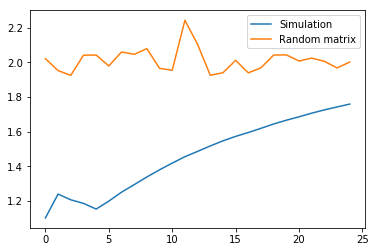

In [6]:
"""
Code die de fractal dimension (of radial dimension) bepaalt van een matrix M
Verbeterpunten: 
-code bekijkt nu telkens naar vierkanten, cirkels is mis beter
-code maakt nu alleen onderscheid tussen 'vacant' en 'niet vacant', maar nog niet tussen de verschillende soorten bebouwing 
(commerce, industrie, huizen)
"""

import math


def fractal_dimension(M):

    N = len(M)

    list_radius = []
    list_number_occupied_cells = []

    # Bekijk telkens een vierkant gebied en tel het aantal bezette cellen
    # Elke tijdstap neemt de grootte van het gebied toe
    # radius is hier de halve lengte van het vierkant waar je naar kijkt
    for length in range(2, N, 2):
        radius = length/2
        left_index = math.ceil((N-length)/2)
        right_index = left_index + length - 1
        number_occupied_cells = 0
        for i in range(left_index, right_index+1):
            for j in range(left_index, right_index+1):
                if M[i, j] != 0:
                    number_occupied_cells += 1

        # Vergelijk het aantal bezette cellen van de huidige tijdstap met het aantal bezette cellen van de vorige tijdstap
        # Als ze niet gelijk zijn -> voeg waardes (radius, aantal bezette cellen) toe aan de lijsten
        if len(list_number_occupied_cells) == 0:
            list_radius.append(radius)
            list_number_occupied_cells.append(number_occupied_cells)
        else:
            if number_occupied_cells != list_number_occupied_cells[-1]:
                list_radius.append(radius)
                list_number_occupied_cells.append(number_occupied_cells)

    # Neem de log waardes van de radius en het aantal bezette cellen
    list_radius_log = [math.log10(i) for i in list_radius]
    list_number_occupied_cells_log = [math.log10(i+0.0001) for i in list_number_occupied_cells]

    # Linear regression
    from scipy import stats
    slope, intercept, r_value, p_value, std_err = stats.linregress(list_radius_log, list_number_occupied_cells_log)
    list_fitted_data = [slope * i + intercept for i in list_radius_log]

#     Plot data
#     plt.plot(list_radius_log, list_number_occupied_cells_log, 'ko')
#     plt.plot(list_radius_log, list_fitted_data)
#     plt.xlabel("log(r)")
#     plt.ylabel("log(Bt)")
#     plt.show()

    # Fractal dimension (of radial dimension) is gelijk aan de helling van de gefitte curve
    fractal_dimension = slope
    
    return fractal_dimension

fds = []
for city in citiesovertime:
    fds.append(fractal_dimension(city))
    
controlM = []
for control in range(len(citiesovertime)):
    randomM = random_matrix()
    controlM.append(fractal_dimension(randomM))
    
plt.plot(range(len(citiesovertime)), fds, label = "Simulation")
plt.plot(range(len(citiesovertime)), controlM, label = "Random matrix")
plt.legend(fontsize="medium")
plt.show()

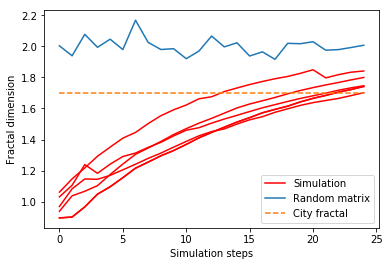

In [98]:
sims = 5
width = 50
height = 50

for sim in range(sims):

    initialcity = np.zeros((width, height))
    
    initialcity[int(width/2), int(height/2)] = 1
    
    citiesovertime = simulate_growth(initialcity, width, height, 25, Nh, 1.5, mkd, 3)
    
    fds = []
    for city in citiesovertime:
        fds.append(fractal_dimension(city))
        
    plt.plot(range(len(citiesovertime)), fds, c = "red")
    
plt.plot(range(len(citiesovertime)), fds, label = "Simulation", c = "red")    

controlM = []
for control in range(len(citiesovertime)):
    randomM = random_matrix()
    controlM.append(fractal_dimension(randomM))
    
plt.plot(range(len(citiesovertime)), controlM, label = "Random matrix")
plt.plot(range(len(citiesovertime)), np.linspace(1.7, 1.7, len(citiesovertime)), linestyle = "dashed", label = "City fractal")
plt.legend(fontsize="medium")
plt.xlabel('Simulation steps')
plt.ylabel('Fractal dimension')
plt.show()

In [93]:
from scipy import stats

width = 50
height = 50
steps = 25
a = 1.5
Nh = 0.02
n = 3
sims = 50

randomMav = []
cityav = []
for sim in range(sims):
    randomM = random_matrix()
    randomMav.append(fractal_dimension(randomM))
    
    initialcity = np.zeros((width, height))
    initialcity[int(width/2),int(height/2)] = 1
    citiesovertime = simulate_growth(initialcity, width, height, steps, Nh, a, mkd, n)
    
    cityav.append(fractal_dimension(citiesovertime[(steps-1)]))

In [94]:
average_random = np.mean(randomMav)
random_ste = np.std(randomMav)
print("random", average_random, random_ste)
k2, p = stats.normaltest(randomMav)
print("normal p-value random", p)

average_cities = np.mean(cityav)
city_ste = np.std(cityav)
print("cities average", average_cities)
k2_city, p_city = stats.normaltest(cityav)
print("normal p-value city", p_city)

if p < 0.05 or p_city < 0.05:
    U, p_compare = stats.mannwhitneyu(randomMav, cityav)
    print("Mann Whitney U test p-value", p_compare)
else:
    T, p_ttest = stats.ttest_ind(randomMav, cityav)
    print("Independent t-test p-value", p_ttest)

random 2.0064167256878767 0.07266280302337429
normal p-value random 6.249676164786316e-06
cities average 1.7304358119960248
normal p-value city 0.06209053914478919
Mann Whitney U test p-value 3.533035965194466e-18


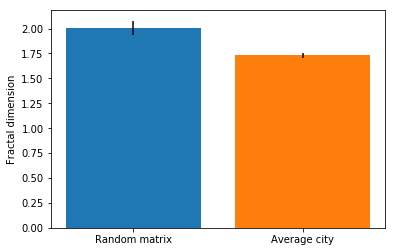

In [95]:
plt.bar('Random matrix', average_random, yerr = random_ste)
plt.bar('Average city', average_cities, yerr = city_ste)
plt.ylabel('Fractal dimension')
plt.show()

0.004275476190476193
0.004554563492063493
0.0028813586956521727
range(0, 175, 7)
0.003781794899201722


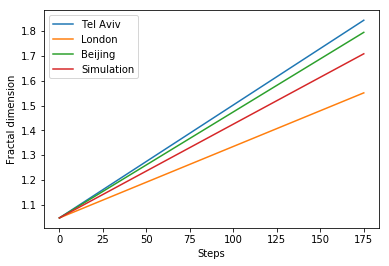

In [109]:
Nh = 0.02

initialcity = np.zeros((width, height))
initialcity[int(width/2),int(height/2)] = 1
citiesovertime = simulate_growth(initialcity, width, height, steps, Nh, a, mkd, n)

fds = []
for city in citiesovertime:
    fds.append(fractal_dimension(city))

beijingfd = [1.8507, 1.8099, 1.8039, 1.8584, 1.8130, 1.8071, 1.8998, 1.8602, 1.8530, 1.9297, 
             1.8986, 1.8909, 1.9575, 1.9335, 1.9259]
beijingfd = [1.8507, 1.8584, 1.8998, 1.9297, 1.9575]
beijingyears = [1988, 1992, 1999, 2006, 2009]

avslopebeijing = 0
for t in range(len(beijingfd) - 1):
    avslopebeijing += (beijingfd[t + 1] - beijingfd[t]) / (beijingyears[t + 1] - beijingyears[t]) 
    
slopebeijing = avslopebeijing/len(beijingfd)
print(slopebeijing)

telavivfd = [1.533, 1.607, 1.644, 1.672, 1.695, 1.773, 1.787, 1.809]
telavivyears = [1935, 1942, 1952, 1962, 1971, 1978, 1985, 1991]

avslopeta = 0
for t in range(len(telavivfd) - 1):
    avslopeta += (telavivfd[t + 1] - telavivfd[t]) / (telavivyears[t + 1] - telavivyears[t]) 
    
slopeta = avslopeta/len(telavivfd)
print(slopeta)

londonfd = [1.322, 1.585, 1.415, 1.700, 1.737, 1.765, 1.791, 1.774]
londonyears = [1820, 1840, 1860, 1880, 1900, 1914, 1939, 1962]

avslopelondon = 0
for t in range(len(londonfd) - 1):
    avslopelondon += (londonfd[t + 1] - londonfd[t]) / (londonyears[t + 1] - londonyears[t]) 
    
slopelondon = avslopelondon/len(londonfd)
print(slopelondon)

fdyears = range(0, len(fds) * 7, 7)
print(fdyears)
avslopesim = 0
for t in range(len(fds) - 1):
    avslopesim += (fds[t + 1] - fds[t]) / (fdyears[t + 1] - fdyears[t])
    
slopesim = avslopesim/len(fds)
print(slopesim)

x = np.linspace(0,len(citiesovertime)*7, 7)
yta = slopeta*x+fds[0]
ylo = slopelondon*x+fds[0]
ybe = slopebeijing*x+fds[0]
ysim = slopesim*x+fds[0]

plt.plot(x, yta, label = "Tel Aviv")
plt.plot(x, ylo, label = "London")
plt.plot(x, ybe, label = "Beijing")
plt.plot(x, ysim, label = "Simulation")
plt.xlabel('Steps')
plt.ylabel('Fractal dimension')
# print(len(citiesovertime))
# print(np.linspace(0, len(citiesovertime)*2, 2))
# plt.plot(np.linspace(0, len(citiesovertime)*5, len(citiesovertime)), fds, label = "Simulation")
plt.legend()
plt.show()


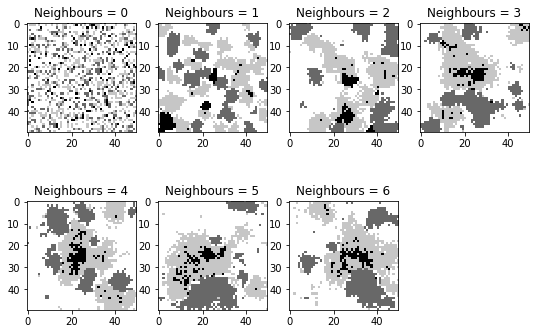

In [69]:
neighboursnum = [0, 1, 2, 3, 4, 5, 6]
width = 50
height = 50
steps = 40
a = 1.5
N = 0.05

fig = plt.subplots(figsize = (9,6))
# ax = f.add_subplot(121)
# ax2 = f.add_subplot(122)
# x = np.linspace(0,4,1000)


for n in neighboursnum:
    
    initialcity = np.zeros((width, height))
    
    initialcity[int(width/2), int(height/2)] = 1
    
    citiesovertime = simulate_growth(initialcity, width, height, steps, Nh, a, mkd, n)
    
    fds = []
    for city in citiesovertime:
        fds.append(fractal_dimension(city))
        
#     plt.plot(range(len(citiesovertime)), fds, label = "N = %i" %n)
    
#     ax = f.add_subplot(121 + n)
#     ax.imshow(citiesovertime[24], cmap = "Greys")
    
#     ax2 = plt.subplot(2, 4, (n + 1))
#     ax2.set_figheight(15)
#     ax2.set_figwidth(15)
#     ax2.imshow(citiesovertime[24], cmap = "Greys")
    
    plt.subplot(2, 4, (n+1))
    plt.imshow(citiesovertime[24], cmap = "Greys")
    plt.title("Neighbours = %i" %n)

    
# controlM = []
# for control in range(len(citiesovertime)):
#     randomM = random_matrix()
#     controlM.append(fractal_dimension(randomM))
    
# plt.plot(range(len(citiesovertime)), controlM, label = "Random matrix")
    
# plt.legend()
plt.show()
   
    

[[1.970017346716183, 2.022584058246534, 2.042629617502002, 2.0819867782498664, 1.8947117586257065], [1.8430807780041034, 1.6745316845636675, 2.225836609975415, 1.782101315671021, 1.8179866405551275], [1.7512574419208642, 1.7049464337068274, 1.7160082571925959, 1.7313334359284422, 1.734380736891709], [1.7497348593019368, 1.751687608237978, 1.74709884953281, 1.717862734371714, 1.7282998634380127], [1.7563390348028083, 1.7462691643886243, 1.7688770429416272, 1.756574290684515, 1.7186448517540642], [1.75066374484015, 1.7379998544254411, 1.7853303520366983, 1.7682253106469141, 1.763839778117565], [1.7227829815490863, 1.7207305451108188, 1.7389041054591945, 1.764326882073678, 1.7268641705936807]]
[2.0023859118680587, 1.8687074057538666, 1.7275852611280875, 1.7389367829764903, 1.749340876914328, 1.7612118080133534, 1.7347217369572916]


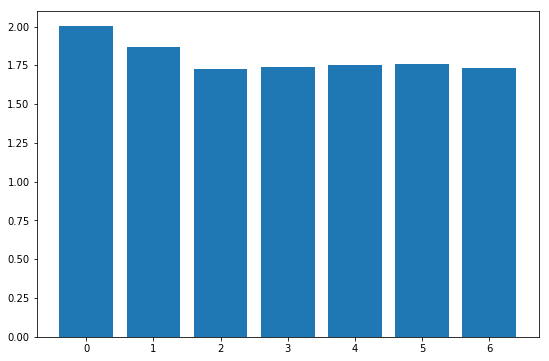

In [9]:
neighboursnum = [0, 1, 2, 3, 4, 5, 6]
width = 50
height = 50
steps = 25
a = 1.5
N = 0.05
sims = 5

fig = plt.subplots(figsize = (9,6))

allfds = []
for n in neighboursnum:
    thisfds = []
    for i in range(sims):
    
        initialcity = np.zeros((width, height))

        initialcity[int(width/2), int(height/2)] = 1

        citiesovertime = simulate_growth(initialcity, width, height, steps, Nh, a, mkd, n)
        
        thisfds.append(fractal_dimension(citiesovertime[(steps-1)]))
        
    allfds.append(thisfds)
        
print(allfds)
avfd = []

for av in allfds:
    avfd.append(np.mean(av))
    
print(avfd)

plt.bar(neighboursnum, avfd)

plt.show()


# controlM = []
# for control in range(len(citiesovertime)):
#     randomM = random_matrix()
#     controlM.append(fractal_dimension(randomM))
    
# plt.plot(range(len(citiesovertime)), controlM, label = "Random matrix")
    
# plt.legend()
# plt.show()
   

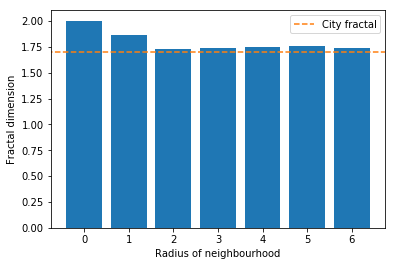

In [24]:
plt.bar(neighboursnum, avfd)
plt.plot(range(-1, len(neighboursnum) + 1), np.linspace(1.70, 1.70, len(neighboursnum) + 2), linestyle = 'dashed', c = "C1", label = "City fractal")
plt.xlim([-0.75, len(neighboursnum) - 1 + 0.75])
plt.xlabel('Radius of neighbourhood')
plt.ylabel('Fractal dimension')
plt.legend()

plt.show()

In [ ]:
# Canadian land use

house_perc = 40/93
ind_perc = 39/93
com_perc = 15/93
# vacant_perc = 7/100

p1 = plt.bar("Canadian cities", house_perc, label = "Houses")
p2 = plt.bar("Canadian cities", ind_perc, bottom=house_perc, label = "Industry")
p3 = plt.bar("Canadian cities", com_perc, bottom=(house_perc +ind_perc), label = "Commerce")
# p4 = plt.bar([1], vacant_perc, bottom=(house_perc + ind_perc + com_perc))

# spa_

width = 50
height = 50
steps = 25
a = 1.5
N = 0.05
n = 6
sims = 10

av_counts = []
for sim in range(sims):

    initialcity = np.zeros((width, height))

    initialcity[int(width/2), int(height/2)] = 1

    citiesovertime = simulate_growth(initialcity, width, height, steps, Nh, a, mkd, n)

    # plt.imshow(citiesovertime[24], cmap = "Greys")
    # plt.show()

    unique, counts = np.unique(citiesovertime[24], return_counts=True)
    av_counts.append(counts)
    
averages = list(map(mean, zip(*av_counts)))
print(averages)
    
# count_landuse = dict(zip(unique, counts))
# print(count_landuse)

sim_house_perc = averages[1]/(averages[1] + averages[2] + averages[3])
sim_ind_perc = averages[2]/(averages[1] + averages[2] + averages[3])
sim_com_perc = averages[3]/(averages[1] + averages[2] + averages[3])
# # sim_vac_perc = count_landuse[0.0]/(width*height)

p5 = plt.bar("Simulation", sim_house_perc, color = "C0")
p6 = plt.bar("Simulation", sim_ind_perc, bottom=sim_house_perc, color = "C1")
p7 = plt.bar("Simulation", sim_com_perc, bottom=(sim_house_perc+sim_ind_perc), color = "C2")
# # p8 = plt.bar([2], sim_vac_perc, bottom=(sim_house_perc+sim_ind_perc+sim_com_perc))
plt.ylabel('Ratio')
plt.legend()
plt.show()

